# Load Big datasets

## Data Loading

*   https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks
*   https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
* https://archive.ics.uci.edu/dataset/52/ionosphere



In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

### Connectionist Bench (Sonar, Mines vs. Rocks)


*   Each pattern is a set of 60 numbers in the range 0.0 to 1.0.  Each number represents the energy within a particular frequency band, integrated over a certain period of time.  The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

*   The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder).



In [ ]:
def fetch_sonar():
  # fetch dataset
  connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151)

  # data (as pandas dataframes)
  X = connectionist_bench_sonar_mines_vs_rocks.data.features
  y = connectionist_bench_sonar_mines_vs_rocks.data.targets

  missing_values_features = X.isnull().sum().sum()  # Checking is null with every feature, then sum
  missing_values_targets = y.isnull().sum().sum()

  #Mapping target classes R - rock to 0, M - mine to 1
  y['class'] = y['class'].replace({'R': 0, 'M': 1})
  target_counts = y['class'].value_counts()

  if missing_values_features == 0 and missing_values_targets == 0:
      print("No missing data in features and targets.")
  else:
      print(f"Missing data detected! Features missing values: {missing_values_features}, Targets missing values: {missing_values_targets}")

  print("Tail features sonar data", X.tail)
  print("Tail targets sonar data", y.tail)

  return X, y

In [128]:
sonar_X, sonar_y = fetch_sonar()

No missing data in features and targets.
Tail features sonar data <bound method NDFrame.tail of      Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0        0.0200      0.0371      0.0428      0.0207      0.0954      0.0986   
1        0.0453      0.0523      0.0843      0.0689      0.1183      0.2583   
2        0.0262      0.0582      0.1099      0.1083      0.0974      0.2280   
3        0.0100      0.0171      0.0623      0.0205      0.0205      0.0368   
4        0.0762      0.0666      0.0481      0.0394      0.0590      0.0649   
..          ...         ...         ...         ...         ...         ...   
203      0.0187      0.0346      0.0168      0.0177      0.0393      0.1630   
204      0.0323      0.0101      0.0298      0.0564      0.0760      0.0958   
205      0.0522      0.0437      0.0180      0.0292      0.0351      0.1171   
206      0.0303      0.0353      0.0490      0.0608      0.0167      0.1354   
207      0.0260      0.0363      0.

<ipython-input-34-1d32617517ed>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].replace({'R': 0, 'M': 1})


##  UCI ML Breast Cancer Wisconsin (Diagnostic) dataset

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
data = load_breast_cancer()
print(data['data'])
print(data.feature_names)

df_describe = pd.DataFrame(data['data'])
print(df_describe.describe())
print("Target data is already prepared for binary classification. Example: ", data.target[[10, 50, 60]])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
               0           1         

<Axes: >

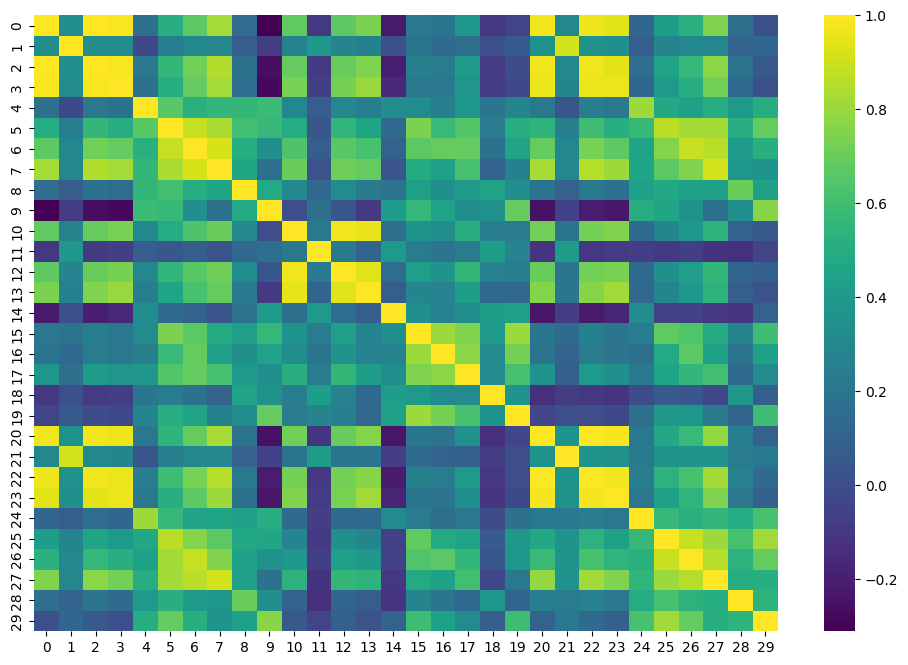

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
correlation_matrix = df_describe.corr()
sns.heatmap(df_describe.corr(), cmap='viridis')

In [ ]:
threshold = 0.9
highly_correlated = np.where(np.abs(correlation_matrix) > threshold)
correlated_features = set()

# Iterate over the indices of highly correlated features
for x, y in zip(*highly_correlated):
    if x != y and x < y:  # Ensure not to include self-correlation and only include one pair of each feature
        feature1 = correlation_matrix.index[x]
        feature2 = correlation_matrix.columns[y]
        correlation = correlation_matrix.iloc[x, y]
        correlated_features.add((feature1, feature2, correlation))
print("Highly Correlated Features:")
for feature1, feature2, correlation in correlated_features:
    print(f"{feature1} - {feature2}: {correlation:.2f}")

features_to_remove = set()
for feature1, feature2, _ in correlated_features:
    features_to_remove.add(feature2)

# Remove highly correlated features from the dataset
data_filtered = df_describe.drop(columns=features_to_remove)

print("\nRemoved Features:")
print(features_to_remove)
print("Shape of the filtered dataset:", data_filtered.shape)



Highly Correlated Features:
0 - 3: 0.99
0 - 23: 0.94
0 - 22: 0.97
0 - 2: 1.00
10 - 13: 0.95
10 - 12: 0.97
2 - 23: 0.94
22 - 23: 0.98
2 - 20: 0.97
7 - 27: 0.91
12 - 13: 0.94
2 - 22: 0.97
20 - 23: 0.98
2 - 3: 0.99
3 - 20: 0.96
0 - 20: 0.97
1 - 21: 0.91
20 - 22: 0.99
3 - 23: 0.96
6 - 7: 0.92
3 - 22: 0.96

Removed Features:
{2, 3, 7, 12, 13, 20, 21, 22, 23, 27}
Shape of the filtered dataset: (569, 20)


In [ ]:
X_breast = data_filtered
Y_breast = data.target
print(type(X_breast), type(Y_breast))
X_breast, Y_breast

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


(        0      1        4        5        6       8        9       10      11  \
 0    17.99  10.38  0.11840  0.27760  0.30010  0.2419  0.07871  1.0950  0.9053   
 1    20.57  17.77  0.08474  0.07864  0.08690  0.1812  0.05667  0.5435  0.7339   
 2    19.69  21.25  0.10960  0.15990  0.19740  0.2069  0.05999  0.7456  0.7869   
 3    11.42  20.38  0.14250  0.28390  0.24140  0.2597  0.09744  0.4956  1.1560   
 4    20.29  14.34  0.10030  0.13280  0.19800  0.1809  0.05883  0.7572  0.7813   
 ..     ...    ...      ...      ...      ...     ...      ...     ...     ...   
 564  21.56  22.39  0.11100  0.11590  0.24390  0.1726  0.05623  1.1760  1.2560   
 565  20.13  28.25  0.09780  0.10340  0.14400  0.1752  0.05533  0.7655  2.4630   
 566  16.60  28.08  0.08455  0.10230  0.09251  0.1590  0.05648  0.4564  1.0750   
 567  20.60  29.33  0.11780  0.27700  0.35140  0.2397  0.07016  0.7260  1.5950   
 568   7.76  24.54  0.05263  0.04362  0.00000  0.1587  0.05884  0.3857  1.4280   
 
            14

In [ ]:
X_test.shape

(569, 30)

### Ionosphere


*   This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.
*   The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere.  "Bad" returns are those that do not; their signals pass through the ionosphere.



In [ ]:
def fetch_ionsphere():
  # fetch dataset
  ionosphere = fetch_ucirepo(id=52)

  # data (as pandas dataframes)
  X = ionosphere.data.features
  y = ionosphere.data.targets

  missing_values_features = X.isnull().sum().sum()  # Checking is null with every feature, then sum
  missing_values_targets = y.isnull().sum().sum()

  if missing_values_features == 0 and missing_values_targets == 0:
      print("No missing data in features and targets.")
  else:
      print(f"Missing data detected! Features missing values: {missing_values_features}, Targets missing values: {missing_values_targets}")

  #Mapping target classes b - bad to 0, g - good to 1
  y['Class'] = y['Class'].replace({'b': 0, 'g': 1})

  print("Tail features ionsphere data", X.tail)
  print("Tail targets ionsphere data", y.tail)

  return X, y


In [107]:
ionsphere_X, ionsphere_y = fetch_ionsphere()

No missing data in features and targets.
Tail features ionsphere data <bound method NDFrame.tail of      Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0             1           0     0.99539    -0.05889     0.85243     0.02306   
1             1           0     1.00000    -0.18829     0.93035    -0.36156   
2             1           0     1.00000    -0.03365     1.00000     0.00485   
3             1           0     1.00000    -0.45161     1.00000     1.00000   
4             1           0     1.00000    -0.02401     0.94140     0.06531   
..          ...         ...         ...         ...         ...         ...   
346           1           0     0.83508     0.08298     0.73739    -0.14706   
347           1           0     0.95113     0.00419     0.95183    -0.02723   
348           1           0     0.94701    -0.00034     0.93207    -0.03227   
349           1           0     0.90608    -0.01657     0.98122    -0.01989   
350           1           0    

<ipython-input-46-fa38c4d6c518>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'] = y['Class'].replace({'b': 0, 'g': 1})


In [ ]:
print(type(ionsphere_X), type(ionsphere_y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


# 3 another datasets

In [64]:
!pip install ucimlrepo

In [65]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Erasing colinearities**

In [66]:
import heapq

In [67]:
def test_collinearity(columns, indices, threshold = 1e-10):
  """
  Helper function, testing whether a certain subset of columns is collinear.
  :param columns: the whole set of columns.
  :param indices: indices belonging to the subset.
  :param threshold: the value of determinant, going below which will be
    considered being numerically collinear.
  :return: True if collinear, False otherwise.
  """
  used_columns = []
  for index in indices:
    used_columns.append(columns[index])

  X = np.column_stack(used_columns)
  XX = X.transpose() @ X
  if np.linalg.det(XX) < threshold:
    return True
  else:
    return False

def remove_collinear(X):
  """
  Removes the minimum number of columns to ensure the result matrix will be
  full rank.
  :param X: a numpy matrix one needs a non-collinear version of.
  :return: a numpy matrix with collinearities removed and a set containing
    indices of removed columns.
  """
  columns = []
  p = len(X[0])
  for i in range(p):
    columns.append(X[:,i])

  columns_used = []
  columns_stashed = set()
  columns_removed = set()
  for i in range(p):
    columns_used.append(i)

  heapq.heapify(columns_used)

  last_removed = -1
  while(True):
    if len(columns_used) == 0:
      break

    if test_collinearity(columns, columns_used):
      last_removed = heapq.heappop(columns_used)
      columns_stashed.add(last_removed)
    else:
      if last_removed == -1:
        # If the whole remaining subset is non-collinear, it's time to stop.

        break
      else:
        # If removing a certain column made the subset non-collinear, it means
        # that this column is a good candidate for removal.

        columns_stashed.remove(last_removed)
        columns_removed.add(last_removed)

        # Returning stashed away columns back to the subset.
        for index in columns_stashed:
          columns_used.append(index)
        heapq.heapify(columns_used)
        columns_stashed.clear()
        last_removed = -1

  # Recreating the matrix
  is_used = [False for i in range(p)]
  for index in columns_used:
    is_used[index] = True

  columns_used = []
  for i in range(p):
    if is_used[i]:
      columns_used.append(columns[i])

  X_clean = np.column_stack(columns_used)
  return X_clean, columns_removed


**Heart Disease dataset** (https://archive.ics.uci.edu/dataset/45/heart+disease)

In [68]:
# Let's perform some EDA:

# fetch dataset
data_heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = data_heart_disease.data.features
y = data_heart_disease.data.targets

print(X.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object


In [69]:
# Checking the amount of missing values.
print('missing values\n')
for name in X.columns:
  print(name+': '+str(X[name].isnull().sum()))

print('\nAmount of data points:',len(X))

missing values

age: 0
sex: 0
cp: 0
trestbps: 0
chol: 0
fbs: 0
restecg: 0
thalach: 0
exang: 0
oldpeak: 0
slope: 0
ca: 4
thal: 2

Amount of data points: 303


As one can see, the number of missing values is miniscule compared to the amount of data points we have, so not to complicate stuff too much, we can just remove the incomplete observations if need be.

In [70]:
# Checking the number of categories for each variable.
print('different values present\n')
for name in X.columns:
  print(name+': '+str(X[name].nunique()))

different values present

age: 41
sex: 2
cp: 4
trestbps: 50
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 4
thal: 3


According to the https://archive.ics.uci.edu/dataset/45/heart+disease page, 'cp', 'restecg', 'slope' and 'thal' are categorical variables that have more than 2 possible values, so they should be one-hot-encoded before building the model.

Finally, looking at the target variable:

In [71]:
np.unique(y)

array([0, 1, 2, 3, 4])

We can see that there are 5 possible values for that. In accordance to the experiments mentioned on the dataset's page, we will transform the answers column to have two classes:

0 <- no presence of heart disease (original values: 0)

1 <- presence of heart disease (original values: 1, 2, 3 ,4)


So finally, for a function that returns this dataset in a form palatable for model training:

In [72]:
def fetch_heart_disease():
  # fetch dataset
  data_heart_disease = fetch_ucirepo(id=45)

  # data (as pandas dataframes)
  X = data_heart_disease.data.features
  y = data_heart_disease.data.targets

  # removing missing variables
  X = X.dropna()
  y = y.loc[X.index]

  # one-hot-encoding the detected multi-valued categorical variables
  X = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'],
                     drop_first=True, dtype=int)

  # changing the format to numpy arrays
  # (flattening is necessary for y as .values isn't smart enough to notice that
  # y had only one column)
  X = X.values
  y = y.values.flatten()

  # mapping the answers to {0,1}
  y = (y==0)
  y = y.astype(int)

  # removing collinearities
  X, _ = remove_collinear(X)

  return X, y

In [73]:
X_heart, y_heart = fetch_heart_disease()

**Parkinsons dataset** (https://archive.ics.uci.edu/dataset/174/parkinsons)

In terms of the EDA, this time everything is noted on the page.
There are no missing values, every feature is continous and the target variable is indeed a {0,1} binary value, so the only thing we need to do is to fetch the dataset and turn it into an appropriate numpy arrays.

In [74]:
def fetch_parkinsons():
  # fetch dataset
  data_parkinsons = fetch_ucirepo(id=174)

  # data (as pandas dataframes)
  X = data_parkinsons.data.features
  y = data_parkinsons.data.targets

  # changing the format to numpy arrays
  # (flattening is necessary for y as .values isn't smart enough to notice that
  # y had only one column)
  X = X.values
  y = y.values.flatten()

  # removing collinearities
  X, _ = remove_collinear(X)

  return X, y

In [75]:
X, y = fetch_parkinsons()

In [76]:
# Some columns have been removed
print(len(X[0]))

16


**HCV dataset** (https://archive.ics.uci.edu/dataset/571/hcv+data)

In [77]:
# Let's perform some EDA:

# fetch dataset
data_hcv = fetch_ucirepo(id=571)

# data (as pandas dataframes)
X = data_hcv.data.features
y = data_hcv.data.targets

print(X.dtypes)
print(y.dtypes)

Age       int64
Sex      object
ALB     float64
ALP     float64
AST     float64
BIL     float64
CHE     float64
CHOL    float64
CREA    float64
CGT     float64
PROT    float64
ALT     float64
dtype: object
Category    object
dtype: object


In [78]:
print(np.unique(X['Sex']))

['f' 'm']


Looking at the types, it's obvious that we'll need to map the 'Sex' column to {0,1}.

In [79]:
# Checking the amount of missing values.
print('missing values\n')
for name in X.columns:
  print(name+': '+str(X[name].isnull().sum()))

print('\nAmount of data points:',len(X))

missing values

Age: 0
Sex: 0
ALB: 1
ALP: 18
AST: 0
BIL: 0
CHE: 0
CHOL: 10
CREA: 0
CGT: 0
PROT: 1
ALT: 1

Amount of data points: 615


It seems that apart from the 'ALP' and 'CHOL' columns, there aren't that many missing values, so the plan seems to be removing the observations, where 'ALB', 'PROT' or 'ALT' is missing and then using some regressor to predict the values of 'ALP' and 'CHOL' when necessary.

According to the https://archive.ics.uci.edu/dataset/571/hcv+data page, there are no categorical features, only the target variable is categorical, so there is no need for one-hot-encoding.

Speaking of the target variable, it has 5 different values:

In [80]:
np.unique(y)

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

Thus we'll group those categories into:

0 <- all blood donors (original values: 0 and 0s)

1 <- all the nasty stuff (orignal values: 1, 2 and 3)

Now for the fetching function:

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
def fetch_hcv():
  # fetch dataset
  data_hcv = fetch_ucirepo(id=571)

  # data (as pandas dataframes)
  X = data_hcv.data.features
  y = data_hcv.data.targets

  # mapping the 'Sex' column to numeric values
  X.loc[:,'Sex'] = X['Sex'].map({'m': 0, 'f': 1})
  # mapping the target variable to {0,1}
  y.loc[:,'Category'] = y['Category'].map({'0=Blood Donor': 0,
                                           '0s=suspect Blood Donor': 0,
                                           '1=Hepatitis': 1, '2=Fibrosis': 1,
                                           '3=Cirrhosis': 1})

  # removing rare missing values
  X = X.dropna(subset=['ALB','PROT','ALT'])
  y = y.loc[X.index]

  # Regressing for the remaining missing values
  X_for_lr = X.dropna()
  y_for_lr1 = X_for_lr['ALP'].values
  y_for_lr2 = X_for_lr['CHOL'].values
  X_for_lr = X_for_lr.drop(columns=['ALP','CHOL']).values

  lr = LinearRegression()

  lr.fit(X_for_lr, y_for_lr1)
  ALP_missing = X[X['ALP'].isna()]
  data_for_ALP_predicting = ALP_missing.drop(columns=['ALP', 'CHOL']).values
  ALP_predictions = lr.predict(data_for_ALP_predicting)
  X.loc[X['ALP'].isna(), 'ALP'] = ALP_predictions

  lr.fit(X_for_lr, y_for_lr2)
  CHOL_missing = X[X['CHOL'].isna()]
  data_for_CHOL_predicting = CHOL_missing.drop(columns=['ALP', 'CHOL']).values
  CHOL_predictions = lr.predict(data_for_CHOL_predicting)
  X.loc[X['CHOL'].isna(), 'CHOL'] = CHOL_predictions

  # changing the format to numpy arrays
  # (flattening is necessary for y as .values isn't smart enough to notice that
  # y had only one column)
  X = X.values
  y = y.values.flatten()

  # removing collinearities
  X, _ = remove_collinear(X)

  return X, y

In [83]:
X, y = fetch_hcv()

<ipython-input-82-aee083fc4a77>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'Sex'] = X['Sex'].map({'m': 0, 'f': 1})
<ipython-input-82-aee083fc4a77>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,'Sex'] = X['Sex'].map({'m': 0, 'f': 1})
<ipython-input-82-aee083fc4a77>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [84]:
print(len(X[0]))

12


# Load small datasets

# Adam

In [ ]:
import numpy as np

In [ ]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression cost-function (Cross-entropy loss)
def logistic_loss(X, y, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss

# Gradient of the logistic regression cost-function
def logistic_gradient(X, y, weights):
    predictions = sigmoid(np.dot(X, weights))
    gradient = np.dot(X.T, (predictions - y)) / y.size
    return gradient

# Function to add custom interactions between the variables
def add_custom_interactions(X, interaction_indices):
    interactions = np.array([X[:, i] * X[:, j] for i, j in interaction_indices]).T
    return np.hstack((X, interactions))

In [326]:
from sklearn.metrics import balanced_accuracy_score
# Generate predictions from the custom logistic regression model
def balanced_accuracy(X, y, custom_weights):
  if custom_weights.size == X.shape[1] + 1:
        # Add a column of ones to X to account for the bias term in the weights
        X = np.hstack((np.ones((X.shape[0], 1)), X))
  y_pred_probs_custom = sigmoid(np.dot(X, custom_weights))

  y_pred_custom = (y_pred_probs_custom >= 0.5).astype(int)

  bal_acc_custom = balanced_accuracy_score(y, y_pred_custom)
  return bal_acc_custom

In [ ]:
def compute_log_likelihood(X, y, weights):
    logits = np.dot(X, weights)
    log_likelihood = np.sum(y * logits - np.log1p(np.exp(logits)))
    return log_likelihood

In [324]:
def adam_logistic_regression(X, y, alpha, beta1, beta2, epsilon=1e-8, max_iterations=1000, interaction_indices=None, threshold=1e-6):
    # If interaction_indices is provided, augment the feature set with specified interaction terms
    if interaction_indices:
        X = add_custom_interactions(X, interaction_indices)

    # Initialize weights
    weights = np.zeros(X.shape[1])

    # Initialize first moment and second moment
    m = np.zeros(X.shape[1])
    v = np.zeros(X.shape[1])
    log_likelihood_history = []
    for t in range(1, max_iterations+1):
        # Compute the gradient
        g = logistic_gradient(X, y, weights)

        # Update moments
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * np.square(g)

        # Compute bias-corrected moments
        m_corrected = m / (1 - beta1 ** t)
        v_corrected = v / (1 - beta2 ** t)

        beta_old = np.copy(weights)
        # Update weights
        weights -= alpha * m_corrected / (np.sqrt(v_corrected) + epsilon)

        # Print the loss value occasionally to monitor progress
        if t % 100 == 0 or t == 1:
            loss = logistic_loss(X, y, weights)
            print(f'Iteration {t}/{max_iterations} - Loss: {loss}')

        # Calculate log-likelihood and append to history after the update
        current_log_likelihood = compute_log_likelihood(X, y, weights)
        log_likelihood_history.append(current_log_likelihood)

        # Convergence check based on weights change
        diff = beta_old - weights
        diff_norm = np.linalg.norm(diff)
        if diff_norm < threshold:
            print(f"Algorithm stopped due to convergence at iteration {t}. Norm of weight difference: {diff_norm:.6f}")
            break

        # If the algorithm did not converge within the max iterations, print that information
        if t == max_iterations:
          print(f"Algorithm reached the maximum number of iterations: {max_iterations}")

    return weights, log_likelihood_history

# Test on fake data

In [ ]:
def generate_fake_data(n: int):
  X = np.random.normal(loc=0,scale=1,size=(n,3))
  Y = X[:,0] + (X[:,1] * X[:,2])
  Y = (Y > 1).astype(int)
  return X, Y

In [ ]:
X, y = generate_fake_data(10)
print(X)

[[-0.89565096 -0.55759158 -0.22398289]
 [-0.4551438   0.15373351 -0.74359082]
 [ 0.35047165  0.37919655  0.77276871]
 [ 0.89025591  0.81883407  0.68484671]
 [-0.11605876 -1.00659674  0.31362304]
 [ 0.61285097 -0.1101846  -1.37660063]
 [ 0.89226472  0.33934765  0.89822575]
 [ 0.2564311  -0.49601225 -0.39096263]
 [ 0.48355458 -1.69924241 -0.38001659]
 [ 0.08587151  0.00351885  0.7366613 ]]


In [323]:
alpha = 0.001 #learning rate
beta1 = 0.9
beta2 = 0.999
interaction_indices = [(0, 1), (0, 2), (1, 2)]  # Interactions between X1*X2, X1*X3, and X2*X3

# Train the logistic regression model using ADAM with specified interactions
custom_weights, log_history = adam_logistic_regression(X, y, alpha, beta1, beta2, max_iterations=1000, interaction_indices=interaction_indices)
weights_without_interactions, log_history = adam_logistic_regression(X, y, alpha, beta1, beta2, max_iterations=1000)
print(weights_without_interactions)
print(custom_weights)

InvalidIndexError: (slice(None, None, None), 0)

# Testing on big datasets

In [320]:
import pandas as pd
from sklearn.metrics import balanced_accuracy_score

# Function to perform your experiment, e.g., training a model with the ADAM optimizer
def run_experiment(X_train, y_train, X_test, y_test, experiment_name, if_interactions=False):
    alpha = 0.001 #learning rate
    beta1 = 0.9
    beta2 = 0.999
    print(experiment_name)
    interaction_indices = [(0, 1)]
    # Run your optimizer to train the model
    if if_interactions:
      weights, log_likelihood_history = adam_logistic_regression(X_train, y_train, alpha, beta1, beta2, max_iterations=500, interaction_indices=interaction_indices)
    else:
      weights, log_likelihood_history = adam_logistic_regression(X_train, y_train, alpha, beta1, beta2, max_iterations=500)
    # Calculate the balanced accuracy on the test set
    test_balanced_accuracy = balanced_accuracy(X_test, y_test, weights)
    print(test_balanced_accuracy)
    # Create a dictionary to store the results
    experiment_results = {
        'experiment_name': experiment_name,
        'log_likelihood_history': log_likelihood_history,
        'number_of_iterations': len(log_likelihood_history),
        'balanced_accuracy': test_balanced_accuracy
    }

    return experiment_results

#Checking if every dataset is in the right format

In [129]:
sonar_X = sonar_X.values
sonar_y = np.asarray(sonar_y)
sonar_y = sonar_y.flatten()

In [130]:
sonar_X

array([[0.02  , 0.0371, 0.0428, ..., 0.0084, 0.009 , 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018 , ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049 , ..., 0.0079, 0.0036, 0.0048],
       [0.026 , 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]])

In [133]:
sonar_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
X_breast = np.asarray(X_breast)

In [109]:
ionsphere_X = np.asarray(ionsphere_X)
ionsphere_y = np.asarray(ionsphere_y)
ionsphere_y = ionsphere_y.flatten()

In [85]:
X_heart, y_heart = fetch_heart_disease()

In [115]:
print(X_heart.shape, y_heart.shape)

(297, 18) (297,)


In [86]:
X_parkinson, y_parkinson = fetch_parkinsons()

In [87]:
X_hcv, y_hcv = fetch_hcv()

<ipython-input-82-aee083fc4a77>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'Sex'] = X['Sex'].map({'m': 0, 'f': 1})
<ipython-input-82-aee083fc4a77>:10: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.loc[:,'Sex'] = X['Sex'].map({'m': 0, 'f': 1})
<ipython-input-82-aee083fc4a77>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [152]:
y_heart = np.asarray(y_heart)
y_heart = y_heart.flatten()


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

#Load small dataset

In [236]:
diabetes  = pd.read_csv(r'/content/diabetes.csv') # small dataset

In [238]:
X_diabetes = diabetes.iloc[:, :-1]
Y_diabetes = diabetes["Outcome"]

In [243]:
Y_diabetes = np.asarray(Y_diabetes)
Y_diabetes = Y_diabetes.flatten()

In [248]:
X_diabetes=np.asarray(X_diabetes)

In [298]:
columns = ['Variance', 'Skewness', 'Class']
banknote = pd.read_csv(r'/content/data_banknote_authentication_pca.txt', header=None, names=columns)
banknote = banknote.iloc[1:]

In [299]:
X_bank = banknote.iloc[:, :-1]
Y_bank = banknote["Class"]

In [301]:
X_bank = np.asarray(X_bank)
X_bank = [[float(number) for number in inner_list] for inner_list in X_bank]
X_bank = np.asarray(X_bank)
Y_bank = [[int(number) for number in inner_list] for inner_list in Y_bank]
Y_bank = np.asarray(Y_bank)
Y_bank = Y_bank.flatten()

In [308]:
fraud = pd.read_csv(r'/content/fraud_detection_dataset_cleaned.txt')
X_fraud = fraud.iloc[:, :-1]
Y_fraud = fraud["is_fraud"]

In [309]:
X_fraud = np.asarray(X_fraud)
Y_fraud = np.asarray(Y_fraud)

#Testing Adam on big datasets

In [226]:
#sonar_X, sonar_y, X_breast, Y_breast, _X, ionspherionspheree_y, X_heart, y_heart, X_parkinson, y_parkinson, X_hcv, y_hcv

In [227]:
all_experiment_results = []

In [228]:
#Sonar
title="Sonar"
from sklearn.model_selection import train_test_split
mean_balanced_acc = []
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(sonar_X, sonar_y, test_size=0.3, random_state=i)
  results_1 =run_experiment(X_train, y_train, X_test, y_test, title)
  mean_balanced_acc.append(results_1["balanced_accuracy"])

results_1["balanced_accuracy"] = np.mean(mean_balanced_acc)
print(results_1["balanced_accuracy"])
#It takes the log-like function from last expermient
all_experiment_results.append(results_1)

Sonar
Iteration 1/500 - Loss: 0.6921673562122808
Iteration 100/500 - Loss: 0.6418428863890534
Iteration 200/500 - Loss: 0.6034088338225829
Iteration 300/500 - Loss: 0.5721763604376524
Iteration 400/500 - Loss: 0.5464452773334616
Iteration 500/500 - Loss: 0.5249860493056951
Algorithm reached the maximum number of iterations: 500
0.7342799188640974
Sonar
Iteration 1/500 - Loss: 0.6920510683465634
Iteration 100/500 - Loss: 0.6424209963503728
Iteration 200/500 - Loss: 0.6045149884855325
Iteration 300/500 - Loss: 0.5733987589982101
Iteration 400/500 - Loss: 0.5478255767946999
Iteration 500/500 - Loss: 0.5265845052217505
Algorithm reached the maximum number of iterations: 500
0.7111895161290323
Sonar
Iteration 1/500 - Loss: 0.69227976642076
Iteration 100/500 - Loss: 0.6483006057551798
Iteration 200/500 - Loss: 0.6125125972573058
Iteration 300/500 - Loss: 0.5832159510659757
Iteration 400/500 - Loss: 0.5589900422800709
Iteration 500/500 - Loss: 0.5387254303434104
Algorithm reached the maximum 

In [229]:
#Breast
title="Breast"
from sklearn.model_selection import train_test_split
mean_balanced_acc = []
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(X_breast, Y_breast, test_size=0.3, random_state=i)
  results_2 =run_experiment(X_train, y_train, X_test, y_test, title)
  mean_balanced_acc.append(results_2["balanced_accuracy"])

results_2["balanced_accuracy"] = np.mean(mean_balanced_acc)
print(results_2["balanced_accuracy"])
#It takes the log-like function from last expermient
all_experiment_results.append(results_2)

Breast
Iteration 1/500 - Loss: 0.6908078313615811
Iteration 100/500 - Loss: 0.6234120427520091
Iteration 200/500 - Loss: 0.5916708582997776
Iteration 300/500 - Loss: 0.573667539924419
Iteration 400/500 - Loss: 0.5594700658975111
Iteration 500/500 - Loss: 0.5464180963160324
Algorithm reached the maximum number of iterations: 500
0.673941798941799
Breast
Iteration 1/500 - Loss: 0.6910454008469531
Iteration 100/500 - Loss: 0.6259570704477202
Iteration 200/500 - Loss: 0.5953732953683674
Iteration 300/500 - Loss: 0.5771534936691314
Iteration 400/500 - Loss: 0.5621165730085417
Iteration 500/500 - Loss: 0.5481521598272462
Algorithm reached the maximum number of iterations: 500
0.6871693121693122
Breast
Iteration 1/500 - Loss: 0.6905058782980582
Iteration 100/500 - Loss: 0.6320333840225207
Iteration 200/500 - Loss: 0.6022277769393694
Iteration 300/500 - Loss: 0.5845707684205375
Iteration 400/500 - Loss: 0.5705679176882351
Iteration 500/500 - Loss: 0.5577503699624408
Algorithm reached the maxim

In [230]:
#Ionsphere
title="Ionsphere"
from sklearn.model_selection import train_test_split
mean_balanced_acc = []
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(ionsphere_X, ionsphere_y, test_size=0.3, random_state=i)
  results_1 =run_experiment(X_train, y_train, X_test, y_test, title)
  mean_balanced_acc.append(results_1["balanced_accuracy"])

results_1["balanced_accuracy"] = np.mean(mean_balanced_acc)
print(results_1["balanced_accuracy"])
#It takes the log-like function from last expermient
all_experiment_results.append(results_1)

Ionsphere
Iteration 1/500 - Loss: 0.6903722266517557
Iteration 100/500 - Loss: 0.5479145220934577
Iteration 200/500 - Loss: 0.4999806869337956
Iteration 300/500 - Loss: 0.46920150933440014
Iteration 400/500 - Loss: 0.4466603266494115
Iteration 500/500 - Loss: 0.4289628555103742
Algorithm reached the maximum number of iterations: 500
0.7159090909090909
Ionsphere
Iteration 1/500 - Loss: 0.6906694245343246
Iteration 100/500 - Loss: 0.5599890858220912
Iteration 200/500 - Loss: 0.5108895488631626
Iteration 300/500 - Loss: 0.48100866057710806
Iteration 400/500 - Loss: 0.4590874955327786
Iteration 500/500 - Loss: 0.44141737335539716
Algorithm reached the maximum number of iterations: 500
0.6944444444444444
Ionsphere
Iteration 1/500 - Loss: 0.6902262896950365
Iteration 100/500 - Loss: 0.5315989660245559
Iteration 200/500 - Loss: 0.47707183252702984
Iteration 300/500 - Loss: 0.445107900535805
Iteration 400/500 - Loss: 0.4225618806838793
Iteration 500/500 - Loss: 0.4049809724112759
Algorithm rea

In [231]:
#Heart
title="Heart"
from sklearn.model_selection import train_test_split
mean_balanced_acc = []
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(X_heart, y_heart, test_size=0.3, random_state=i)
  results_1 =run_experiment(X_train, y_train, X_test, y_test, title)
  mean_balanced_acc.append(results_1["balanced_accuracy"])

results_1["balanced_accuracy"] = np.mean(mean_balanced_acc)
print(results_1["balanced_accuracy"])
#It takes the log-like function from last expermient
all_experiment_results.append(results_1)

Heart
Iteration 1/500 - Loss: 0.7108406836925574
Iteration 100/500 - Loss: 0.5042640041444746
Iteration 200/500 - Loss: 0.45922022004678137
Iteration 300/500 - Loss: 0.4262704840814968
Iteration 400/500 - Loss: 0.40188794609668127
Iteration 500/500 - Loss: 0.38372158797146505
Algorithm reached the maximum number of iterations: 500
0.7708333333333333
Heart
Iteration 1/500 - Loss: 0.7175513739377687
Iteration 100/500 - Loss: 0.5100010237919831
Iteration 200/500 - Loss: 0.46240425437667043
Iteration 300/500 - Loss: 0.42625414713608095
Iteration 400/500 - Loss: 0.3988167901074035
Iteration 500/500 - Loss: 0.37794894307718685
Algorithm reached the maximum number of iterations: 500
0.7767722473604827
Heart
Iteration 1/500 - Loss: 0.7069070210133366
Iteration 100/500 - Loss: 0.5182270083377529
Iteration 200/500 - Loss: 0.4753992820065156
Iteration 300/500 - Loss: 0.4437753488505174
Iteration 400/500 - Loss: 0.42017949964532747
Iteration 500/500 - Loss: 0.40222464874232583
Algorithm reached th

In [232]:
#Parkinson
title="Parkinson"
from sklearn.model_selection import train_test_split
mean_balanced_acc = []
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(X_parkinson, y_parkinson, test_size=0.3, random_state=i)
  results_1 =run_experiment(X_train, y_train, X_test, y_test, title)
  mean_balanced_acc.append(results_1["balanced_accuracy"])

results_1["balanced_accuracy"] = np.mean(mean_balanced_acc)
print(results_1["balanced_accuracy"])
#It takes the log-like function from last expermient
all_experiment_results.append(results_1)

Parkinson
Iteration 1/500 - Loss: 0.6234271897153595
Iteration 100/500 - Loss: 0.57498422204276
Iteration 200/500 - Loss: 0.5478999509798717
Iteration 300/500 - Loss: 0.5240967810282808
Iteration 400/500 - Loss: 0.5027769948090204
Iteration 500/500 - Loss: 0.4839409667190151
Algorithm reached the maximum number of iterations: 500
0.6153846153846154
Parkinson
Iteration 1/500 - Loss: 0.6039088871149334
Iteration 100/500 - Loss: 0.5295397798128593
Iteration 200/500 - Loss: 0.5028613168694159
Iteration 300/500 - Loss: 0.48049626253239724
Iteration 400/500 - Loss: 0.4602116642466236
Iteration 500/500 - Loss: 0.4420133088262716
Algorithm reached the maximum number of iterations: 500
0.5526315789473684
Parkinson
Iteration 1/500 - Loss: 0.6287599275751632
Iteration 100/500 - Loss: 0.5750888683088891
Iteration 200/500 - Loss: 0.5436145787326415
Iteration 300/500 - Loss: 0.5159434297560198
Iteration 400/500 - Loss: 0.49120095942591996
Iteration 500/500 - Loss: 0.46931315147052455
Algorithm reach

In [233]:
#Hcv
title="Hcv"
from sklearn.model_selection import train_test_split
mean_balanced_acc = []
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(X_hcv, y_hcv, test_size=0.3, random_state=i)
  results_1 =run_experiment(X_train, y_train, X_test, y_test, title)
  mean_balanced_acc.append(results_1["balanced_accuracy"])

results_1["balanced_accuracy"] = np.mean(mean_balanced_acc)
print(results_1["balanced_accuracy"])
#It takes the log-like function from last expermient
all_experiment_results.append(results_1)

Hcv
Iteration 1/500 - Loss: 0.5681231757580323
Iteration 100/500 - Loss: 0.1660336762799733
Iteration 200/500 - Loss: 0.15267186921871012
Iteration 300/500 - Loss: 0.14800580801243135
Iteration 400/500 - Loss: 0.14565852826442055
Iteration 500/500 - Loss: 0.144041443119013
Algorithm reached the maximum number of iterations: 500
0.7732919254658385
Hcv
Iteration 1/500 - Loss: 0.5678026257390376
Iteration 100/500 - Loss: 0.1715488776724476
Iteration 200/500 - Loss: 0.15877417186859533
Iteration 300/500 - Loss: 0.15321755952866098
Iteration 400/500 - Loss: 0.1495086810292698
Iteration 500/500 - Loss: 0.14648478012069602
Algorithm reached the maximum number of iterations: 500
0.7765118317265556
Hcv
Iteration 1/500 - Loss: 0.5700644517016705
Iteration 100/500 - Loss: 0.133829767589309
Iteration 200/500 - Loss: 0.12023957608346415
Iteration 300/500 - Loss: 0.11532727692828698
Iteration 400/500 - Loss: 0.11272485862910865
Iteration 500/500 - Loss: 0.11104880974622724
Algorithm reached the maxi

<ipython-input-3-9801421dd320>:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-9801421dd320>:9: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


In [234]:
results_df = pd.DataFrame(all_experiment_results)
results_df.to_csv('experiment_results.csv', index=False)

#Testing on small datasets

## With interactions

In [328]:
small_data_experiments_with_interactions=[]

In [329]:
title="Diabetes"
mean_balanced_acc
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(X_diabetes, Y_diabetes, test_size=0.3, random_state=i)
  results_2 =run_experiment(X_train, y_train, X_test, y_test, title, if_interactions=True)

  mean_balanced_acc.append(results_2["balanced_accuracy"])

results_2["balanced_accuracy"] = np.mean(mean_balanced_acc)
print(results_2["balanced_accuracy"])
#It takes the log-like function from last expermient
small_data_experiments_with_interactions.append(results_2)

Diabetes
Iteration 1/500 - Loss: 0.7716298786439287
Iteration 100/500 - Loss: 0.6073915480073103
Iteration 200/500 - Loss: 0.6028125883183937
Iteration 300/500 - Loss: 0.5987395312821494
Iteration 400/500 - Loss: 0.5951345049345864
Iteration 500/500 - Loss: 0.5921243595818931
Algorithm reached the maximum number of iterations: 500
0.49285591323807887
Diabetes
Iteration 1/500 - Loss: 0.7475813249352027
Iteration 100/500 - Loss: 0.5866807911569724
Iteration 200/500 - Loss: 0.5822699100553447
Iteration 300/500 - Loss: 0.5783264260969444
Iteration 400/500 - Loss: 0.5748722853935283
Iteration 500/500 - Loss: 0.5720074610129792
Algorithm reached the maximum number of iterations: 500
0.4827961321514907
Diabetes
Iteration 1/500 - Loss: 0.6756708037263477
Iteration 100/500 - Loss: 0.5647327226998129
Iteration 200/500 - Loss: 0.5597239482061727
Iteration 300/500 - Loss: 0.5559713874390783
Iteration 400/500 - Loss: 0.5528843535186685
Iteration 500/500 - Loss: 0.5504660807703378
Algorithm reached 

In [332]:
title="Bank"
mean_balanced_acc = []
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(X_bank, Y_bank, test_size=0.3, random_state=i)
  results_2 =run_experiment(X_train, y_train, X_test, y_test, title, if_interactions=True)
  mean_balanced_acc.append(results_2["balanced_accuracy"])

results_2["balanced_accuracy"] = np.mean(mean_balanced_acc)
print(results_2["balanced_accuracy"])
#It takes the log-like function from last expermient
small_data_experiments_with_interactions.append(results_2)

Bank
Iteration 1/500 - Loss: 0.6924924142090076
Iteration 100/500 - Loss: 0.6390501155848657
Iteration 200/500 - Loss: 0.6015628238146633
Iteration 300/500 - Loss: 0.5725756330858758
Iteration 400/500 - Loss: 0.5491915492351045
Iteration 500/500 - Loss: 0.5300570524716905
Algorithm reached the maximum number of iterations: 500
0.7
Bank
Iteration 1/500 - Loss: 0.6925319246913657
Iteration 100/500 - Loss: 0.6412597700357897
Iteration 200/500 - Loss: 0.6032609114774651
Iteration 300/500 - Loss: 0.5732007115468265
Iteration 400/500 - Loss: 0.5490569616937845
Iteration 500/500 - Loss: 0.5294634168239754
Algorithm reached the maximum number of iterations: 500
0.6654405577593461
Bank
Iteration 1/500 - Loss: 0.6924554451018916
Iteration 100/500 - Loss: 0.6359685235208021
Iteration 200/500 - Loss: 0.5958928353727031
Iteration 300/500 - Loss: 0.5645754958194067
Iteration 400/500 - Loss: 0.5392576765113802
Iteration 500/500 - Loss: 0.5185572412992406
Algorithm reached the maximum number of iterat

In [333]:
title="Fraud"
mean_balanced_acc = []
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(X_fraud, Y_fraud, test_size=0.3, random_state=i)
  results_2 =run_experiment(X_train, y_train, X_test, y_test, title, if_interactions=True)
  mean_balanced_acc.append(results_2["balanced_accuracy"])

results_2["balanced_accuracy"] = np.mean(mean_balanced_acc)
print(results_2["balanced_accuracy"])
#It takes the log-like function from last expermient
small_data_experiments_with_interactions.append(results_2)

Fraud


<ipython-input-3-9801421dd320>:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-9801421dd320>:9: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


Iteration 1/500 - Loss: nan


<ipython-input-1-c193c5551b37>:3: RuntimeWarning: overflow encountered in exp
  log_likelihood = np.sum(y * logits - np.log1p(np.exp(logits)))


Iteration 100/500 - Loss: nan
Iteration 200/500 - Loss: nan
Iteration 300/500 - Loss: nan
Iteration 400/500 - Loss: nan
Iteration 500/500 - Loss: nan
Algorithm reached the maximum number of iterations: 500
0.49999333883989233
Fraud


<ipython-input-3-9801421dd320>:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-9801421dd320>:9: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


Iteration 1/500 - Loss: nan


<ipython-input-1-c193c5551b37>:3: RuntimeWarning: overflow encountered in exp
  log_likelihood = np.sum(y * logits - np.log1p(np.exp(logits)))


Iteration 100/500 - Loss: nan
Iteration 200/500 - Loss: nan
Iteration 300/500 - Loss: nan
Iteration 400/500 - Loss: nan
Iteration 500/500 - Loss: nan
Algorithm reached the maximum number of iterations: 500
0.49986517033481037
Fraud


<ipython-input-3-9801421dd320>:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-9801421dd320>:9: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


Iteration 1/500 - Loss: nan


<ipython-input-1-c193c5551b37>:3: RuntimeWarning: overflow encountered in exp
  log_likelihood = np.sum(y * logits - np.log1p(np.exp(logits)))


Iteration 100/500 - Loss: nan
Iteration 200/500 - Loss: nan
Iteration 300/500 - Loss: nan
Iteration 400/500 - Loss: nan
Iteration 500/500 - Loss: nan
Algorithm reached the maximum number of iterations: 500
0.5
Fraud


<ipython-input-3-9801421dd320>:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-9801421dd320>:9: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


Iteration 1/500 - Loss: nan


<ipython-input-1-c193c5551b37>:3: RuntimeWarning: overflow encountered in exp
  log_likelihood = np.sum(y * logits - np.log1p(np.exp(logits)))


Iteration 100/500 - Loss: nan
Iteration 200/500 - Loss: nan
Iteration 300/500 - Loss: nan
Iteration 400/500 - Loss: nan
Iteration 500/500 - Loss: nan
Algorithm reached the maximum number of iterations: 500
0.5
Fraud


<ipython-input-3-9801421dd320>:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-9801421dd320>:9: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


Iteration 1/500 - Loss: nan


<ipython-input-1-c193c5551b37>:3: RuntimeWarning: overflow encountered in exp
  log_likelihood = np.sum(y * logits - np.log1p(np.exp(logits)))


Iteration 100/500 - Loss: nan
Iteration 200/500 - Loss: nan
Iteration 300/500 - Loss: nan
Iteration 400/500 - Loss: nan
Iteration 500/500 - Loss: nan
Algorithm reached the maximum number of iterations: 500
0.5
0.4999717018349406


In [335]:
results_df_small = pd.DataFrame(small_data_experiments_with_interactions)
results_df_small.to_csv('small_data_set_experiment_results_with_interactions.csv', index=False)

## Without interactions

In [311]:
small_data_experiments =[]

In [312]:
title="Diabetes"
mean_balanced_acc
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(X_diabetes, Y_diabetes, test_size=0.3, random_state=i)
  results_2 =run_experiment(X_train, y_train, X_test, y_test, title)

  mean_balanced_acc.append(results_2["balanced_accuracy"])

results_2["balanced_accuracy"] = np.mean(mean_balanced_acc)
print(results_2["balanced_accuracy"])
#It takes the log-like function from last expermient
small_data_experiments.append(results_2)

Diabetes
Iteration 1/500 - Loss: 0.6806073932985435
Iteration 100/500 - Loss: 0.6239308852871734
Iteration 200/500 - Loss: 0.623102056219557
Iteration 300/500 - Loss: 0.622954599638847
Iteration 400/500 - Loss: 0.6228919391145639
Iteration 500/500 - Loss: 0.6228680342240533
Algorithm reached the maximum number of iterations: 500
0.6521346186951282
Diabetes
Iteration 1/500 - Loss: 0.6720291042524539
Iteration 100/500 - Loss: 0.6036472399544808
Iteration 200/500 - Loss: 0.6026579118463246
Iteration 300/500 - Loss: 0.6025891091969237
Iteration 400/500 - Loss: 0.6025733793135104
Iteration 500/500 - Loss: 0.6025678450815168
Algorithm reached the maximum number of iterations: 500
0.58883964544722
Diabetes
Iteration 1/500 - Loss: 0.6788736557343917
Iteration 100/500 - Loss: 0.6004419606557373
Iteration 200/500 - Loss: 0.5918216700606456
Iteration 300/500 - Loss: 0.5890698077697651
Iteration 400/500 - Loss: 0.5882112455213031
Iteration 500/500 - Loss: 0.5878787636388798
Algorithm reached the m

In [313]:
title="Bank"
mean_balanced_acc = []
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(X_bank, Y_bank, test_size=0.3, random_state=i)
  results_2 =run_experiment(X_train, y_train, X_test, y_test, title)
  mean_balanced_acc.append(results_2["balanced_accuracy"])

results_2["balanced_accuracy"] = np.mean(mean_balanced_acc)
print(results_2["balanced_accuracy"])
#It takes the log-like function from last expermient
small_data_experiments.append(results_2)

Bank
Iteration 1/500 - Loss: 0.6926142332222456
Iteration 100/500 - Loss: 0.6451518930830245
Iteration 200/500 - Loss: 0.6075610337728179
Iteration 300/500 - Loss: 0.5781994662410033
Iteration 400/500 - Loss: 0.5550936390131969
Iteration 500/500 - Loss: 0.5367211950546398
Algorithm reached the maximum number of iterations: 500
0.7777298850574713
Bank
Iteration 1/500 - Loss: 0.692611213696167
Iteration 100/500 - Loss: 0.6447002911196112
Iteration 200/500 - Loss: 0.6064442773613574
Iteration 300/500 - Loss: 0.5763793029122157
Iteration 400/500 - Loss: 0.5526405479562615
Iteration 500/500 - Loss: 0.533745992014186
Algorithm reached the maximum number of iterations: 500
0.7714148335136435
Bank
Iteration 1/500 - Loss: 0.6925774939408085
Iteration 100/500 - Loss: 0.6417536651712319
Iteration 200/500 - Loss: 0.6013420857087769
Iteration 300/500 - Loss: 0.5696617044420468
Iteration 400/500 - Loss: 0.5446527683281384
Iteration 500/500 - Loss: 0.5247173388287739
Algorithm reached the maximum num

In [314]:
title="Fraud"
mean_balanced_acc = []
for i in range(0, 5):
  X_train, X_test, y_train, y_test = train_test_split(X_fraud, Y_fraud, test_size=0.3, random_state=i)
  results_2 =run_experiment(X_train, y_train, X_test, y_test, title)
  mean_balanced_acc.append(results_2["balanced_accuracy"])

results_2["balanced_accuracy"] = np.mean(mean_balanced_acc)
print(results_2["balanced_accuracy"])
#It takes the log-like function from last expermient
small_data_experiments.append(results_2)

Fraud


<ipython-input-3-9801421dd320>:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-9801421dd320>:9: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


Iteration 1/500 - Loss: nan
Iteration 100/500 - Loss: nan
Iteration 200/500 - Loss: nan
Iteration 300/500 - Loss: nan
Iteration 400/500 - Loss: nan
Iteration 500/500 - Loss: nan
Algorithm reached the maximum number of iterations: 500
0.9598297566818816
Fraud
Iteration 1/500 - Loss: nan


<ipython-input-3-9801421dd320>:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-9801421dd320>:9: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


Iteration 100/500 - Loss: nan
Iteration 200/500 - Loss: nan
Iteration 300/500 - Loss: nan
Iteration 400/500 - Loss: nan
Iteration 500/500 - Loss: nan
Algorithm reached the maximum number of iterations: 500
0.9597981816707846
Fraud
Iteration 1/500 - Loss: 29.133824821457313


<ipython-input-3-9801421dd320>:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-9801421dd320>:9: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


Iteration 100/500 - Loss: nan
Iteration 200/500 - Loss: nan
Iteration 300/500 - Loss: nan
Iteration 400/500 - Loss: nan
Iteration 500/500 - Loss: nan
Algorithm reached the maximum number of iterations: 500
0.5259698071214145
Fraud


<ipython-input-3-9801421dd320>:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-9801421dd320>:9: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


Iteration 1/500 - Loss: nan
Iteration 100/500 - Loss: nan
Iteration 200/500 - Loss: nan
Iteration 300/500 - Loss: nan
Iteration 400/500 - Loss: nan
Iteration 500/500 - Loss: nan
Algorithm reached the maximum number of iterations: 500
0.9597584798292516
Fraud
Iteration 1/500 - Loss: 53.791327020655594


<ipython-input-3-9801421dd320>:9: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-9801421dd320>:9: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


Iteration 100/500 - Loss: nan
Iteration 200/500 - Loss: nan
Iteration 300/500 - Loss: nan
Iteration 400/500 - Loss: nan
Iteration 500/500 - Loss: nan
Algorithm reached the maximum number of iterations: 500
0.9593277820896915
0.8729368014786049


In [315]:
results_df_small = pd.DataFrame(small_data_experiments)
results_df_small.to_csv('small_data_set_experiment_results_without_interactions.csv', index=False)